In [35]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime

In [36]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [37]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [38]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [39]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [40]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [41]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zhigalovo
Processing Record 2 of Set 1 | erenhot
Processing Record 3 of Set 1 | broome
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | ixtapa
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | saint george
Processing Record 9 of Set 1 | samfya
Processing Record 10 of Set 1 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | saldanha
Processing Record 13 of Set 1 | mehamn
Processing Record 14 of Set 1 | casa grande
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | kununurra
Processing Record 18 of Set 1 | vanimo
Processing Record 19 of Set 1 | turukhansk
Processing Record 20 of Set 1 | nalut
Processing Record 21 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 22 of

Processing Record 39 of Set 4 | kirakira
Processing Record 40 of Set 4 | shakawe
Processing Record 41 of Set 4 | saint-philippe
Processing Record 42 of Set 4 | ermoupolis
Processing Record 43 of Set 4 | mumbwa
Processing Record 44 of Set 4 | cabinda
Processing Record 45 of Set 4 | monte gordo
Processing Record 46 of Set 4 | tuatapere
Processing Record 47 of Set 4 | hilo
Processing Record 48 of Set 4 | ribeira grande
Processing Record 49 of Set 4 | san patricio
Processing Record 50 of Set 4 | reinsvoll
Processing Record 1 of Set 5 | susanville
Processing Record 2 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 3 of Set 5 | tiznit
Processing Record 4 of Set 5 | tessalit
Processing Record 5 of Set 5 | taraz
Processing Record 6 of Set 5 | mareeba
Processing Record 7 of Set 5 | paris
Processing Record 8 of Set 5 | esperance
Processing Record 9 of Set 5 | sijunjung
Processing Record 10 of Set 5 | dickinson
Processing Record 11 of Set 5 | le moule
Processing Record 12 of Se

Processing Record 30 of Set 8 | itarema
Processing Record 31 of Set 8 | luganville
Processing Record 32 of Set 8 | khandagayty
Processing Record 33 of Set 8 | kontagora
Processing Record 34 of Set 8 | yuci
Processing Record 35 of Set 8 | port blair
Processing Record 36 of Set 8 | laguna
Processing Record 37 of Set 8 | faanui
Processing Record 38 of Set 8 | mecayapan
Processing Record 39 of Set 8 | urucara
Processing Record 40 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 41 of Set 8 | mezen
Processing Record 42 of Set 8 | wenling
Processing Record 43 of Set 8 | datong
Processing Record 44 of Set 8 | ust-omchug
Processing Record 45 of Set 8 | pavlovsk
Processing Record 46 of Set 8 | muncar
Processing Record 47 of Set 8 | wellington
Processing Record 48 of Set 8 | lasa
Processing Record 49 of Set 8 | elko
Processing Record 50 of Set 8 | mwinilunga
Processing Record 1 of Set 9 | breytovo
Processing Record 2 of Set 9 | sioux lookout
Processing Record 3 of Set 9 | mahadd

Processing Record 17 of Set 12 | coquimbo
Processing Record 18 of Set 12 | mindyak
Processing Record 19 of Set 12 | talavera de la reina
Processing Record 20 of Set 12 | sukhothai
Processing Record 21 of Set 12 | bethel park
Processing Record 22 of Set 12 | lucapa
Processing Record 23 of Set 12 | killybegs
Processing Record 24 of Set 12 | yeppoon
Processing Record 25 of Set 12 | iklad
Processing Record 26 of Set 12 | wanning
Processing Record 27 of Set 12 | bathsheba
Processing Record 28 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 29 of Set 12 | sembakung
Processing Record 30 of Set 12 | kobelyaky
Processing Record 31 of Set 12 | labuhan
Processing Record 32 of Set 12 | talara
Processing Record 33 of Set 12 | namatanai
Processing Record 34 of Set 12 | ostersund
Processing Record 35 of Set 12 | outjo
Processing Record 36 of Set 12 | kralendijk
Processing Record 37 of Set 12 | fayaoue
Processing Record 38 of Set 12 | nova olimpia
Processing Record 39 of Set 12 

In [42]:
len(city_data)

568

In [43]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhigalovo,54.8097,105.1578,25.41,55,100,2.98,RU,2021-10-29 18:40:03
1,Erenhot,43.6475,111.9767,39.27,54,0,9.24,CN,2021-10-29 18:40:04
2,Broome,42.2506,-75.8330,57.42,55,75,4.00,US,2021-10-29 18:40:05
3,Cidreira,-30.1811,-50.2056,70.63,79,100,21.07,BR,2021-10-29 18:40:05
4,Khatanga,71.9667,102.5000,1.76,83,100,11.21,RU,2021-10-29 18:40:06
5,Ixtapa,20.7000,-105.2000,86.23,66,1,0.00,MX,2021-10-29 18:40:07
6,Vaini,-21.2000,-175.2000,71.76,94,75,4.61,TO,2021-10-29 18:40:07
7,Saint George,37.1041,-113.5841,79.27,41,1,3.00,US,2021-10-29 18:37:54
8,Samfya,-11.3649,29.5565,76.96,36,28,5.77,ZM,2021-10-29 18:40:08
9,Hermanus,-34.4187,19.2345,61.90,90,11,7.40,ZA,2021-10-29 18:40:08


In [44]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zhigalovo,RU,2021-10-29 18:40:03,54.8097,105.1578,25.41,55,100,2.98
1,Erenhot,CN,2021-10-29 18:40:04,43.6475,111.9767,39.27,54,0,9.24
2,Broome,US,2021-10-29 18:40:05,42.2506,-75.8330,57.42,55,75,4.00
3,Cidreira,BR,2021-10-29 18:40:05,-30.1811,-50.2056,70.63,79,100,21.07
4,Khatanga,RU,2021-10-29 18:40:06,71.9667,102.5000,1.76,83,100,11.21
5,Ixtapa,MX,2021-10-29 18:40:07,20.7000,-105.2000,86.23,66,1,0.00
6,Vaini,TO,2021-10-29 18:40:07,-21.2000,-175.2000,71.76,94,75,4.61
7,Saint George,US,2021-10-29 18:37:54,37.1041,-113.5841,79.27,41,1,3.00
8,Samfya,ZM,2021-10-29 18:40:08,-11.3649,29.5565,76.96,36,28,5.77
9,Hermanus,ZA,2021-10-29 18:40:08,-34.4187,19.2345,61.90,90,11,7.40


In [45]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [46]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

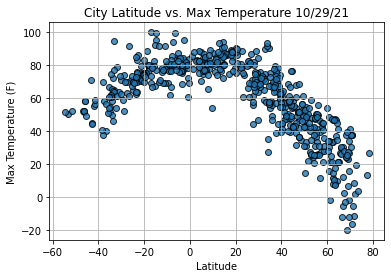

In [47]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

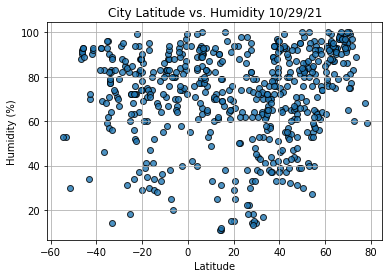

In [48]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

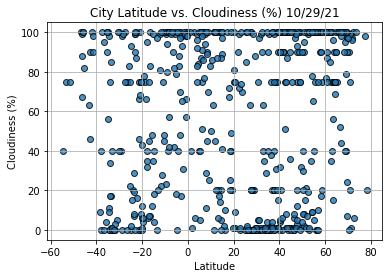

In [49]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

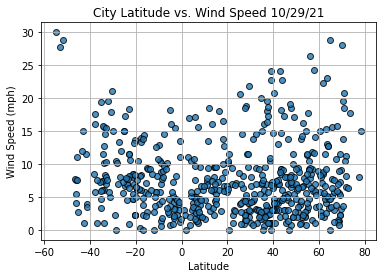

In [50]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [51]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [52]:
index13 = city_data_df.loc[13]
index13

City                   Butaritari
Country                        KI
Date          2021-10-29 18:40:10
Lat                        3.0707
Lng                      172.7902
Max Temp                    83.25
Humidity                       71
Cloudiness                      6
Wind Speed                   17.0
Name: 13, dtype: object

In [53]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zhigalovo,RU,2021-10-29 18:40:03,54.8097,105.1578,25.41,55,100,2.98
1,Erenhot,CN,2021-10-29 18:40:04,43.6475,111.9767,39.27,54,0,9.24
2,Broome,US,2021-10-29 18:40:05,42.2506,-75.8330,57.42,55,75,4.00
4,Khatanga,RU,2021-10-29 18:40:06,71.9667,102.5000,1.76,83,100,11.21
5,Ixtapa,MX,2021-10-29 18:40:07,20.7000,-105.2000,86.23,66,1,0.00


In [54]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

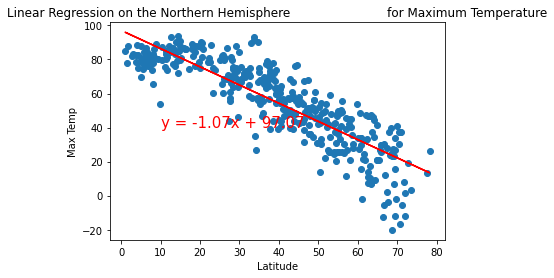

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

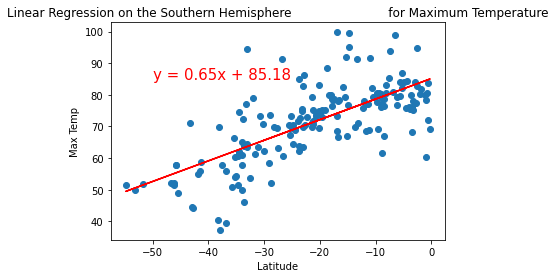

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,85))

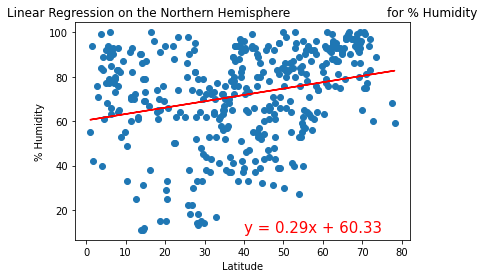

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

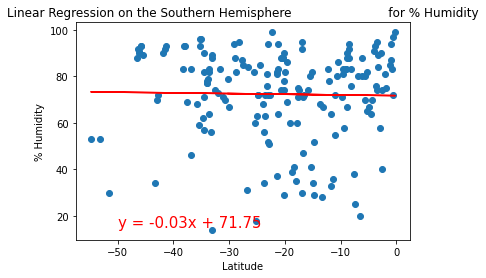

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

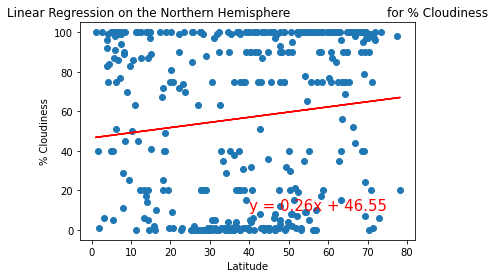

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

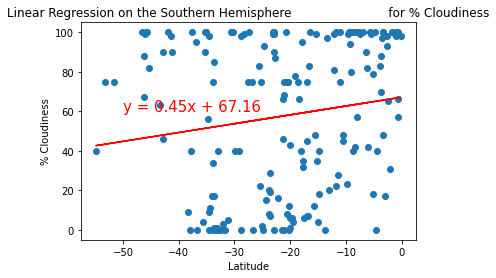

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

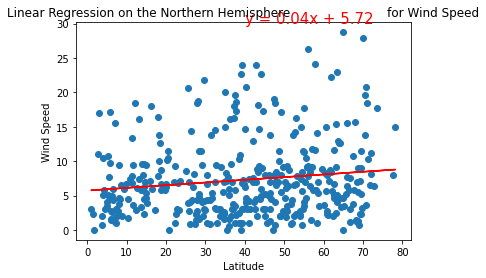

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

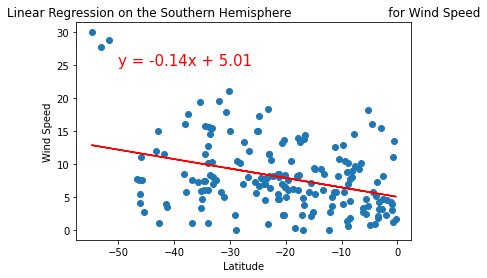

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))

In [63]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = -0.14x + 5.01
The r-value is: -0.349
